# Gradient Descent Testing

In [1]:
import random
import matplotlib.pyplot as plt
import math
import autograd.numpy as np
from autograd import grad


## Make Points

In [2]:
coefficients = [2, -4, 1, 1]


def line(x, coeff):
    y = 0
    for i in range(len(coeff)):
        y += coeff[-i - 1] * (x ** i)

    return y



In [3]:
points = []
offsetRange = 0.5
for i in range(100):
    x = random.uniform(-10, 10)
    y = line(x, coefficients)
    offset = random.uniform(-1.0, 1) * offsetRange
    point = (x + offset, y + offset)
    points.append(point)

x_coordinates = [i[0] for i in points]
y_coordinates = [i[1] for i in points]

points

[(4.87375884660483, 190.60100976090715),
 (-5.391132928362655, -476.03672086728506),
 (-7.633169704871255, -1338.4748190600617),
 (-1.7112170396102666, -31.19117212860164),
 (8.82799477321216, 1213.7699366931035),
 (7.310267445944495, 494.54709727617006),
 (6.717373414583307, 541.0247098282572),
 (-1.6486109145791743, -35.24630335603922),
 (-4.3596786937895216, -257.4938643559348),
 (-5.764726810610449, -574.4520614832577),
 (-2.786848806611392, -57.61122379351929),
 (10.112315726944537, 1571.953765527829),
 (5.9718256834595715, 353.36976506150717),
 (3.285503663816745, 45.767303539602146),
 (-1.4004080044147833, -6.4619862232317375),
 (1.7823211597673598, 3.5785975010531423),
 (-7.317165919536348, -879.2068953767977),
 (-0.34643801166755783, 0.43156015460330344),
 (6.735898900532407, 416.0745394964007),
 (8.000841673728322, 736.6797701261312),
 (8.906910344039206, 1150.7950908681703),
 (-9.148877595054653, -1776.154476653393),
 (8.526117747105822, 1098.7867415778487),
 (-2.79456646570

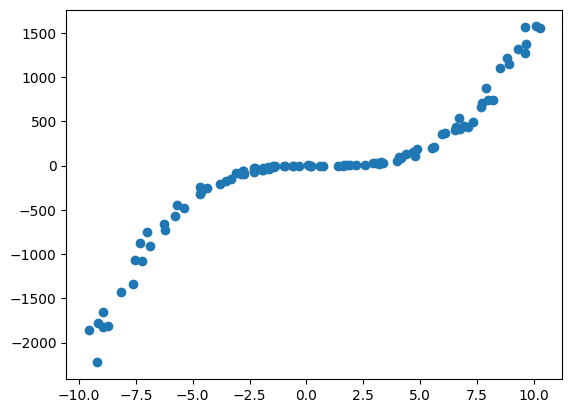

In [4]:
plt.scatter(x_coordinates, y_coordinates)



## Test 1
Assume we know the Gradient is 2 so we are just trying to find the intercept

## Testing Differentiation

In [5]:



f_prime = grad(line)

r = f_prime(2.0, [2, 3, 4])
r

11.0

### Defining a Loss function

In [6]:
def sum_of_squared_residuals(coeff):
    sum = 0
    for x, y in zip(x_coordinates, y_coordinates):
        sum += (y - line(x, coeff)) ** 2

    return math.sqrt(sum)


sum_of_squared_residuals([2, 3])


7162.396876750837

In [7]:
def get_part_dif(_coeff, diff_to, _point):
    mult = -2 * (_point[0] ** (len(_coeff) - diff_to - 1))
    calc = _point[1] - line(_point[0], _coeff)
    return calc * mult


In [8]:
def get_RSS_dif(_coeff, respect_to):
    der = 0
    for x, y in zip(x_coordinates, y_coordinates):
        der += get_part_dif(_coeff, respect_to, [x, y])
    return der


get_RSS_dif([2, 3], 0) * 0.001

-708.7252341628827

In [11]:
a = random.uniform(-10, 10)
b = random.uniform(-10, 10)
c = random.uniform(-10, 10)

coefficient_count = len(coefficients)

temp_coeff = [random.uniform(-10, 10) for i in range(coefficient_count)]
temp_steps = [0 for i in range(coefficient_count)]

learning = 0.000000003
attempts = 1000
alphabet = 'abcdefg'
print(coefficients)

for i in range(attempts):

    print(f'iter {i}')
    SSR = sum_of_squared_residuals([a, b, c])
    print(f'SSR = {SSR} \n')

    for i in range(coefficient_count):
        print(f'{alphabet[i]} = {temp_coeff[i]}')

        temp_steps[i] = -learning * get_RSS_dif(temp_coeff, i)
        print(f'step_{alphabet[i]} = {temp_steps[i]}')
        temp_coeff[i] += temp_steps[i]

    print()
    all_below = True
    for i in temp_steps:
        if abs(i) > 0.0001:
            all_below = False

    print(all_below)

    if all_below:
        break



[2, -4, 1, 1]
iter 0
SSR = 7542.280115744599 

a = 2.7810052727489225
step_a = -0.06323884646596863
b = -2.3059187206759413
step_b = -0.003715470780892922
c = -3.5556161520795504
step_c = -0.0007517018743054742
d = 2.272290812630276
step_d = -5.3084603491843984e-05

False
iter 1
SSR = 7542.280115744599 

a = 2.717766426282954
step_a = -0.05803355885567208
b = -2.3096341914568344
step_b = -0.0035688519828466613
c = -3.556367853953856
step_c = -0.0006865380286376848
d = 2.2722377280267843
step_d = -5.136517609402737e-05

False
iter 2
SSR = 7542.280115744599 

a = 2.659732867427282
step_a = -0.053256339417546684
b = -2.313203043439681
step_b = -0.003434124149303743
c = -3.5570543919824935
step_c = -0.000626733883187837
d = 2.2721863628506904
step_d = -4.978435664587447e-05

False
iter 3
SSR = 7542.280115744599 

a = 2.6064765280097353
step_a = -0.04887198544036983
b = -2.3166371675889845
step_b = -0.003310309586591382
c = -3.5576811258656815
step_c = -0.000571848675594928
d = 2.2721365784

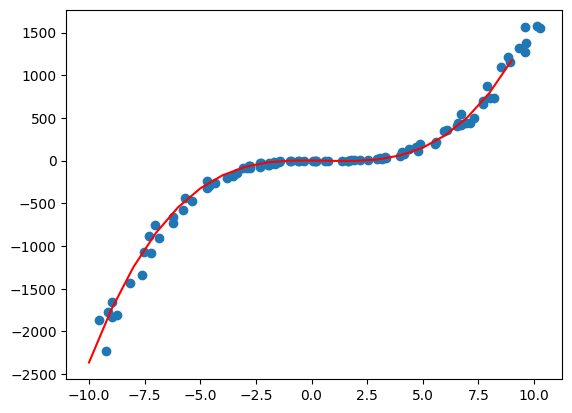

In [12]:
Npoints = []
ranges = [-10, 10]
for i in range(ranges[0], ranges[1]):
    x = i
    y = line(x, temp_coeff)
    point = (x, y)
    Npoints.append(point)

Nx_coordinates = [i[0] for i in Npoints]
Ny_coordinates = [i[1] for i in Npoints]

plt.scatter(x_coordinates, y_coordinates)
plt.plot(Nx_coordinates, Ny_coordinates, c='r')